In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 500
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error loss function. Makes calling the loss function much simpler elsewhere in the code
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer. Now the optimizer function can be called elsewhere in the code much easier
optimizer = tf.optimizers.SGD(learning_rate)

In [12]:
# Optimization process is setup so it can be called elsewhere in the code
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g: # GradientTape stores the gradient/derivative of the current function
        pred = linear_regression(X)
        loss = mean_square(pred, Y)  # We can call the Mean Squared Error function much simpler due to previous declaration

    # Compute gradients.
    gradients = g.gradient(loss, [W, b]) # Here, we are calling function GradientTape, which is called by "g" 
                                        # This function calculates the gradient of the loss with respect to both variables (thus returns two gradients)
    
    # Update W and b (W.x + b) following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b])) #The zip associates The loss wrt W with the variable W, and the loss wrt b with the variable b

In [13]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    # The following steps are only useful for printing the "training" process
    if step % display_step == 0:  #If the remainder is not zero, it means the current display_step is a multiple of 50
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022780895>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0016171001>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.0002283603>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0016130544>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022677332>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.001609277>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022596121>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0016053803>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022616982>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0016014241>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022477657>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0015976317>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022613257>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0015935376>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.0002238378>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.0015898496>]
[<tf.Tensor: shape=(), dtype=float32, numpy=0.00022

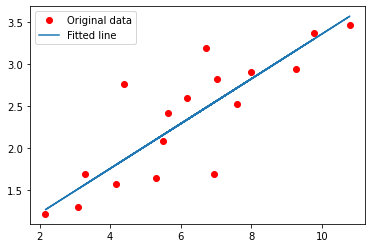

In [ ]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()